# BIRTH RATE ANALYSIS

In [18]:

import pandas as pd
file_path = 'C:\\Users\\jeet\\Downloads\\births.csv'

births = pd.read_csv(file_path)


In [19]:
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [28]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(births.head())


   year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


# We immediately see that male births outnumber female births in every decade. To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year :

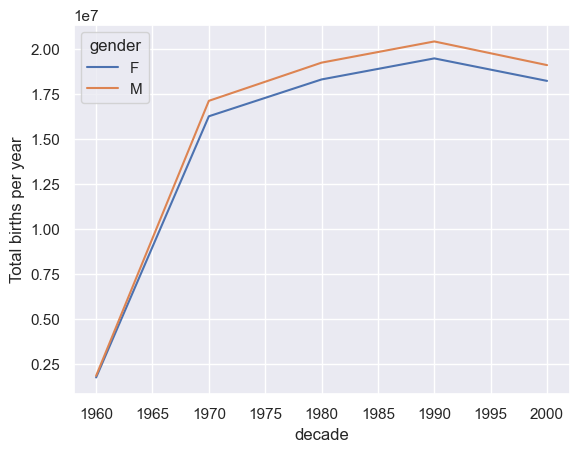

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set() 
birth_decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum') 
birth_decade.plot() 
plt.ylabel("Total births per year") 
plt.show()


# Further data exploration:There are a few interesting features we can pull out of this dataset using the Pandas tools. We must start by cleaning the data a bit, removing outliers caused by mistyped dates or missing values. One easy way to remove these all at once is to cut outliers, we’ll do this via a robust sigma-clipping operation:

In [31]:
import numpy as np
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

# This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution. With this we can use the query() method to filter out rows with births outside these values:

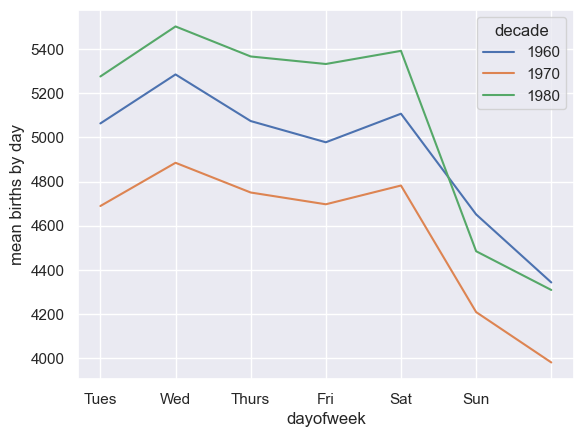

In [39]:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

# Apparently births are slightly less common on weekends than on weekdays! Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.Another interesting view is to plot the mean number of births by the day of the year. Let’s first group the data by month and day separately:

In [49]:
from datetime import datetime
import pandas as pd

# Assuming you have a DataFrame called 'births'
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [datetime(2012, month, day) for (month, day) in births_month.index]
print(births_month.head())


       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


# Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year. From this, we can use the plot method to plot the data. It reveals some interesting trends:

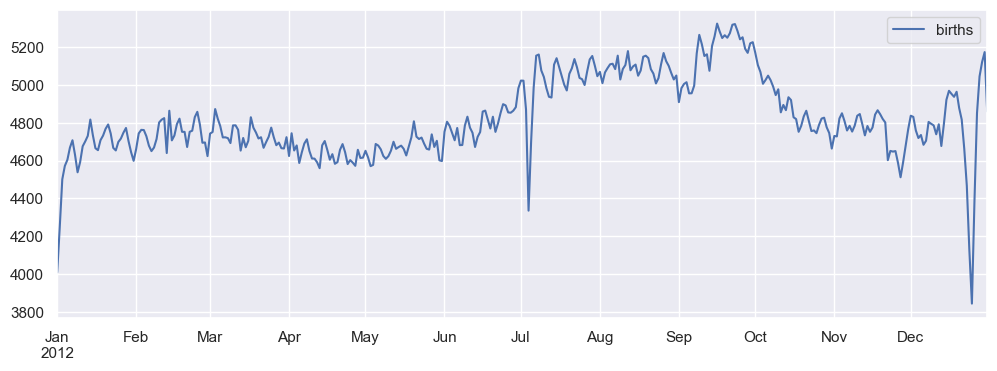

In [36]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()

# Summary: 

# This Python code analyzes birth data, cleans it, and visualizes key trends:

# - It loads birth data, cleans missing values, and groups data by decade.
# - Visualizes total births by year and gender.
# - Removes outliers based on quartiles.
# - Analyzes mean births by day of the week.
# - Calculates and visualizes mean births by date of the year, revealing significant trends in birth data.